In [1]:
!pip install tabula-py

You should consider upgrading via the 'C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
from PIL import Image

# Open the image file
image = Image.open('Cricketscoredcard1b.png')

# Convert the image to RGB (PDF doesn't support RGBA)
image = image.convert('RGB')

# Save the image as a PDF
image.save('output.pdf')


In [5]:
import tabula

# Read PDF file and extract tables
dfs = tabula.read_pdf('output.pdf', pages='all')

# Number of tables extracted
print(len(dfs))

# Print the first table
if dfs:
    print(dfs[0])


Failed to import jpype dependencies. Fallback to subprocess.
No module named 'jpype'


JavaNotFoundError: `java` command is not found from this Python process.Please ensure Java is installed and PATH is set for `java`

In [ ]:
#!pip install pdfplumber

In [ ]:
import pdfplumber
table = [[]]
pdf_path = "Purchasing Enquiry - CA-9009-L24-2466.pdf"
with pdfplumber.open(pdf_path) as doc:
    for i in doc.pages:
        print(i.extract_tables())
        table = i.extract_tables()

[[['COLOMBO DOCKYARD PLC\nPort of Colombo, Colombo 15,\nSri Lanka.', 'PURCHASING ENQUIRY\n(IMPORT)', 'Tel: (Supplies) 0094 112522230\nTel: (General) 0094 112429000\nFax : +94 112523165, 2345863']], [['Atten', 'MR. HU/ MS.GIFT', 'Ref No', 'CA-9009-L24-2466'], ['Supplier', 'OTC DAIHEN ASIA CO., LTD', 'Date', '2024-6-6'], ['Fax Number', '0066-2714-3204', 'Supplier E mail', 'hu@otc.co.th, i-sales-2@otc.co.th,\nyfj999@gmail.com'], ['Country', 'THAILAND', None, None]], [['Project Number', 'CA/9009', 'Nature of Ordering', 'Urgent'], ['Contact Person', 'K.H.S.SUJEEWA', 'Mode of Dispatch', 'Sea'], ['Designation', 'Not Available', 'Mode of Shipment', 'Consolidated'], ['E mail', '', 'Quotation Required', '2024-06-06']], [['No', 'Item Description / Specification', 'Unit', 'Quantity', 'Remarks'], ['1', 'CO2/MAG WELDING MACHINE DYNA AUTO, XD\n350\n------------------------------------------------------\nMAKER - OTC DAIHEN CORPORATION\nMODEL - DYNA AUTO XD 350\nCONSISTING OF ACCESSORIES,\n1. POWER SUP

In [ ]:
print(table[1])

[['Atten', 'MR. HU/ MS.GIFT', 'Ref No', 'CA-9009-L24-2466'], ['Supplier', 'OTC DAIHEN ASIA CO., LTD', 'Date', '2024-6-6'], ['Fax Number', '0066-2714-3204', 'Supplier E mail', 'hu@otc.co.th, i-sales-2@otc.co.th,\nyfj999@gmail.com'], ['Country', 'THAILAND', None, None]]


In [ ]:
supplier = company[1][1]
print(supplier)

date = company[1][3]
print(date)

OTC DAIHEN ASIA CO., LTD
2024-6-6


In [ ]:
company = table[1]
print(company)

[['Atten', 'MR. HU/ MS.GIFT', 'Ref No', 'CA-9009-L24-2466'], ['Supplier', 'OTC DAIHEN ASIA CO., LTD', 'Date', '2024-6-6'], ['Fax Number', '0066-2714-3204', 'Supplier E mail', 'hu@otc.co.th, i-sales-2@otc.co.th,\nyfj999@gmail.com'], ['Country', 'THAILAND', None, None]]


In [ ]:
import pandas as pd
# Extracting column names and values
columns = [item[0] for item in company] + [item[2] for item in company if item[2]]
values = [item[1] for item in company] + [item[3] for item in company if item[3]]

# Create the DataFrame
suppliers = pd.DataFrame([values], columns=columns)

suppliers = suppliers.drop(columns=['Date'])
# Display the DataFrame
print(suppliers)

             Atten                  Supplier      Fax Number   Country  \
0  MR. HU/ MS.GIFT  OTC DAIHEN ASIA CO., LTD  0066-2714-3204  THAILAND   

             Ref No                                    Supplier E mail  
0  CA-9009-L24-2466  hu@otc.co.th, i-sales-2@otc.co.th,\nyfj999@gma...  


In [ ]:
orderList = table[3]
print(orderList)

additional_details = table[2]

[['No', 'Item Description / Specification', 'Unit', 'Quantity', 'Remarks'], ['1', 'CO2/MAG WELDING MACHINE DYNA AUTO, XD\n350\n------------------------------------------------------\nMAKER - OTC DAIHEN CORPORATION\nMODEL - DYNA AUTO XD 350\nCONSISTING OF ACCESSORIES,\n1. POWER SUPPLY - CPXD 350\n2. WIRE FEEDER - CM 2302\n3. WELDING TORCH - WTCX 350D (6mts long)\n4. REMOTE CONTROL UNIT - PART NO XD 350 S\nComplete with 22 Mtrs long Positive cable, Gase\nhose & Control cable\n(Connection sockets to be provided about 1.5Mts\nfrom power supply unit)\nComplete with all accessories', 'NOS', '10.00', '']]


In [ ]:
# Create the DataFrame
orders = pd.DataFrame(orderList[1:], columns=orderList[0])

# Add the supplier and date columns
orders['Supplier'] = supplier
orders['Date'] = date

# Extract and add the additional details columns
for detail in additional_details:
    column1, value1, column2, value2 = detail
    orders[column1] = value1
    orders[column2] = value2

# Reorder the columns to place Supplier first
column_order = ['Supplier', 'No', 'Item Description / Specification', 'Unit', 'Quantity', 'Remarks', 'Date']
additional_columns = [detail[i] for detail in additional_details for i in [0, 2]]
column_order.extend(additional_columns)
orders = orders[column_order]


orders = orders.drop(columns=['No'])

# Reorder the columns to place Supplier first
#orders = orders[['Supplier', 'Item Description / Specification', 'Unit', 'Quantity', 'Remarks', 'Date']]

# Print the DataFrame
print(orders)


                   Supplier  \
0  OTC DAIHEN ASIA CO., LTD   

                    Item Description / Specification Unit Quantity Remarks  \
0  CO2/MAG WELDING MACHINE DYNA AUTO, XD\n350\n--...  NOS    10.00           

       Date Project Number Nature of Ordering Contact Person Mode of Dispatch  \
0  2024-6-6        CA/9009             Urgent  K.H.S.SUJEEWA              Sea   

     Designation Mode of Shipment E mail Quotation Required  
0  Not Available     Consolidated                2024-06-06  


In [ ]:
print(table[2])

[['Project Number', 'CA/9009', 'Nature of Ordering', 'Urgent'], ['Contact Person', 'K.H.S.SUJEEWA', 'Mode of Dispatch', 'Sea'], ['Designation', 'Not Available', 'Mode of Shipment', 'Consolidated'], ['E mail', '', 'Quotation Required', '2024-06-06']]


In [1]:
combinations = []

for count_100 in range(0, 101, 100):
    for count_50 in range(0, 101, 50):
        for count_25 in range(0,101, 25):
            for count_10 in range(0, 101, 10):
                for count_5 in range(0, 101, 5):
                    total_so_far = count_100 + count_50 + count_25 + count_10 + count_5
                    if total_so_far <= 100:
                        combinations.append([count_100, count_50, count_25, count_10, count_5, 100-total_so_far])
            
        

In [6]:
combinations

[[0, 0, 0, 0, 0, 100],
 [0, 0, 0, 0, 5, 95],
 [0, 0, 0, 0, 10, 90],
 [0, 0, 0, 0, 15, 85],
 [0, 0, 0, 0, 20, 80],
 [0, 0, 0, 0, 25, 75],
 [0, 0, 0, 0, 30, 70],
 [0, 0, 0, 0, 35, 65],
 [0, 0, 0, 0, 40, 60],
 [0, 0, 0, 0, 45, 55],
 [0, 0, 0, 0, 50, 50],
 [0, 0, 0, 0, 55, 45],
 [0, 0, 0, 0, 60, 40],
 [0, 0, 0, 0, 65, 35],
 [0, 0, 0, 0, 70, 30],
 [0, 0, 0, 0, 75, 25],
 [0, 0, 0, 0, 80, 20],
 [0, 0, 0, 0, 85, 15],
 [0, 0, 0, 0, 90, 10],
 [0, 0, 0, 0, 95, 5],
 [0, 0, 0, 0, 100, 0],
 [0, 0, 0, 10, 0, 90],
 [0, 0, 0, 10, 5, 85],
 [0, 0, 0, 10, 10, 80],
 [0, 0, 0, 10, 15, 75],
 [0, 0, 0, 10, 20, 70],
 [0, 0, 0, 10, 25, 65],
 [0, 0, 0, 10, 30, 60],
 [0, 0, 0, 10, 35, 55],
 [0, 0, 0, 10, 40, 50],
 [0, 0, 0, 10, 45, 45],
 [0, 0, 0, 10, 50, 40],
 [0, 0, 0, 10, 55, 35],
 [0, 0, 0, 10, 60, 30],
 [0, 0, 0, 10, 65, 25],
 [0, 0, 0, 10, 70, 20],
 [0, 0, 0, 10, 75, 15],
 [0, 0, 0, 10, 80, 10],
 [0, 0, 0, 10, 85, 5],
 [0, 0, 0, 10, 90, 0],
 [0, 0, 0, 20, 0, 80],
 [0, 0, 0, 20, 5, 75],
 [0, 0, 0, 20, 10, 70

In [4]:
combinations = []

def findCombinations(total):
    for count_100 in range(0, total + 1, 100):
        for count_50 in range(0, total + 1, 50):
            for count_25 in range(0,total + 1, 25):
                for count_10 in range(0, total + 1, 10):
                    for count_5 in range(0, total + 1, 5):
                        total_so_far = count_100 + count_50 + count_25 + count_10 + count_5
                        if total_so_far <= total:
                            combinations.append([count_100, count_50, count_25, count_10, count_5, total-total_so_far])
    
    return combinations

In [11]:
len(findCombinations(100))

293

In [12]:
totals = range(100, 600, 100)
lengths = [len(findCombinations(total)) for total in totals]

In [13]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Combinations')

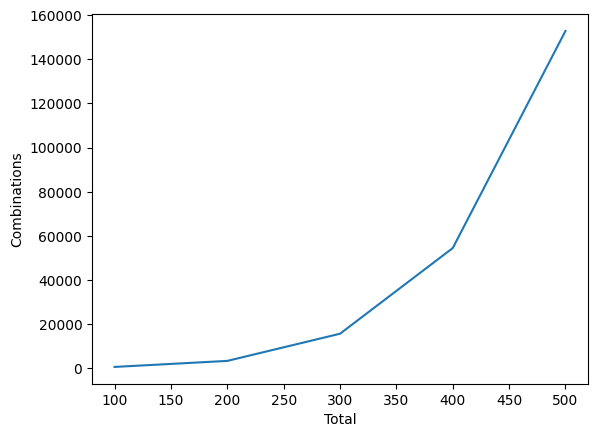

In [16]:
plt.plot(totals, lengths)
plt.xlabel("Total")
plt.ylabel("Combinations")

In [1]:
numbers = [1,2,3,4,5,6,7,8,9,10]

for i in numbers:
    print(i)

1
2
3
4
5
6
7
8
9
10


In [2]:
for x in range(4): #0,1,2,3
    for y in range(3): #0,1,2
        print(f'{x} & {y}')

0 & 0
0 & 1
0 & 2
1 & 0
1 & 1
1 & 2
2 & 0
2 & 1
2 & 2
3 & 0
3 & 1
3 & 2
